In [ ]:
!pip install python3.12.7

ERROR: Could not find a version that satisfies the requirement python3.12.7 (from versions: none)
ERROR: No matching distribution found for python3.12.7


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.datasets import fetch_openml

In [7]:
mnist = fetch_openml('mnist_784',version = 1)

In [9]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [10]:
X,y = mnist["data"], mnist["target"]

In [11]:
X.shape

(70000, 784)

In [12]:
y.shape

(70000,)

In [13]:
some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

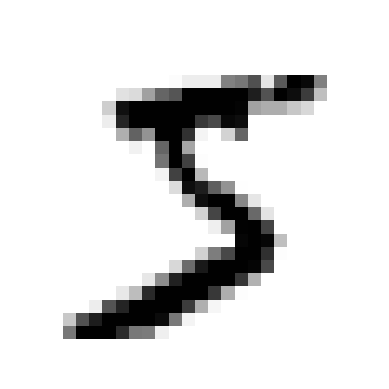

In [14]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")

In [15]:
y[0]

'5'

In [16]:
y = y.astype(np.uint8)

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

In [18]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [19]:
from sklearn.linear_model import SGDClassifier

In [20]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

**# Implementing the cross validation**

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [22]:
skfolds = StratifiedKFold(n_splits = 3)

In [23]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train.iloc[train_index]
  y_train_folds = y_train_5.iloc[train_index]
  X_test_fold = X_train.iloc[test_index]
  y_test_fold = y_train_5.iloc[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [25]:
from sklearn.base import BaseEstimator

In [26]:
class Never5Classifier(BaseEstimator):
  def fit(self,X,y = None):
    pass
  def predict(self,X):
    return np.zeros((len(X),1),dtype = bool)

In [27]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.91125, 0.90855, 0.90915])

# Confusion Matrix

In [28]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

For our "5-detector" model, the matrix has four key numbers:

True Positives (TP): Correctly predicted 5s. The model said "5" and the image was indeed a "5". (In the example, this is 3,530.)

False Positives (FP): Incorrectly predicted 5s. The model said "5" but the image was actually a different number. This is also known as a "Type I error." (In the example, this is 687.)

True Negatives (TN): Correctly predicted non-5s. The model said "not a 5" and the image was indeed not a "5". (In the example, this is 53,892.)

False Negatives (FN): Incorrectly predicted non-5s. The model said "not a 5" but the image was actually a "5". This is also known as a "Type II error." (In the example, this is 1,891.)

A perfect classifier would have a confusion matrix with only true positives and true negatives, meaning all the numbers would be on the main diagonal.

# Pretending We reached to perfection

In [31]:
y_train_perfect_predictions = y_train_5 # pretend that we reached to perfections so that y_perfect = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

**Precision and Recall**
<br>
Scikit-Learn provides several functions to compute classifier metrics,
including precision and recall:

In [32]:
from sklearn.metrics import precision_score, recall_score

In [35]:
precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)

0.8370879772350012

In [36]:
recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325)

0.6511713705958311

It is often convenient to **combine precision and recall into a single metric**
called the **F1 score**, in particular if you need a simple way to compare two
classifiers. The **F1 score** is the harmonic mean of precision and recall. Whereas the regular mean treats all values equally, the
harmonic mean gives much more weight to low values. As a result, the
classifier will only get a high **F1 score** if both recall and precision are high.


In [37]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343847